In [47]:
from ucimlrepo import fetch_ucirepo # Used to import the dataset
import pandas as pd
import numpy as np

from Models import *

# fetch dataset
dataset = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets

# metadata
print(dataset.metadata)

# variable information
print(dataset.variables)

c:\Users\G\AppData\Local\Programs\Python\Python312\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [42]:
category = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X[category] = X[category].apply(pd.to_numeric, errors='coerce')
for cat in category:
    X[cat] = X[cat].interpolate()

In [43]:
PF = np.cos(np.arctan(X['Global_reactive_power'] / X['Global_active_power']))
X.insert(4, 'Power_factor', PF, True)
X.describe(include='all')

,Date_Time,Date,Time,Global_active_power,Power_factor,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.049280e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
unique,2075259,1442,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/12/2006 17:24:00,6/12/2008,17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1440,1442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.090280e+00,9.638261e-01,1.236492e-01,9.636864e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00
std,NaN,NaN,NaN,1.052628e+00,5.786603e-02,1.124194e-01,5.810473e-02,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00
min,NaN,NaN,NaN,7.600000e-02,5.558553e-01,0.000000e+00,5.558553e-01,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,3.100000e-01,9.519304e-01,4.800000e-02,9.519593e-01,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,6.140000e-01,9.934134e-01,1.000000e-01,9.934251e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,NaN,1.528000e+00,9.997095e-01,1.940000e-01,9.997272e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


In [44]:
X['Power_factor'].quantile(q=0.01)

Power_factor    0.756823
Power_factor    0.756823
Name: 0.01, dtype: float64

In [45]:
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import MaxNLocator

# Adjust Date_Time column for sensible plots
DateTime = X['Date'].str.cat(X['Time'].values.astype(str), sep=' ')
X.insert(0, 'Date_Time', DateTime, True) #includes Date_time variable
X = X.drop('Date', axis=1) #removes date column
X = X.drop('Time', axis=1) #removes time column
X.describe(include='all')

,Date_Time,Date_Time,Global_active_power,Power_factor,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.049280e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
unique,2075259,2075259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/12/2006 17:24:00,16/12/2006 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.090280e+00,9.638261e-01,1.236492e-01,9.636864e-01,2.408328e+02,4.621481e+00,1.109485e+00,1.289229e+00,6.442386e+00
std,NaN,NaN,1.052628e+00,5.786603e-02,1.124194e-01,5.810473e-02,3.237763e+00,4.424361e+00,6.115843e+00,5.786613e+00,8.415860e+00
min,NaN,NaN,7.600000e-02,5.558553e-01,0.000000e+00,5.558553e-01,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,3.100000e-01,9.519304e-01,4.800000e-02,9.519593e-01,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,6.140000e-01,9.934134e-01,1.000000e-01,9.934251e-01,2.410000e+02,2.751585e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,1.528000e+00,9.997095e-01,1.940000e-01,9.997272e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


In [6]:
GAE = X['Global_active_power']*(1000/60) - X['Sub_metering_1'] - X['Sub_metering_2'] - X['Sub_metering_3']
X.insert(1, 'GAE', GAE, True)

In [9]:
X.describe(include='all')

,Date_Time,GAE,Global_active_power,Global_reactive_power,Power_factor,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
unique,2075259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/12/2006 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.314693e+00,1.091615e+00,1.237145e-01,9.636864e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,9.585916e+00,1.057294e+00,1.127220e-01,5.810473e-02,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,NaN,-2.400000e+00,7.600000e-02,0.000000e+00,5.558553e-01,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,3.800000e+00,3.080000e-01,4.800000e-02,9.519593e-01,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,5.500000e+00,6.020000e-01,1.000000e-01,9.934251e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,1.036667e+01,1.528000e+00,1.940000e-01,9.997272e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01


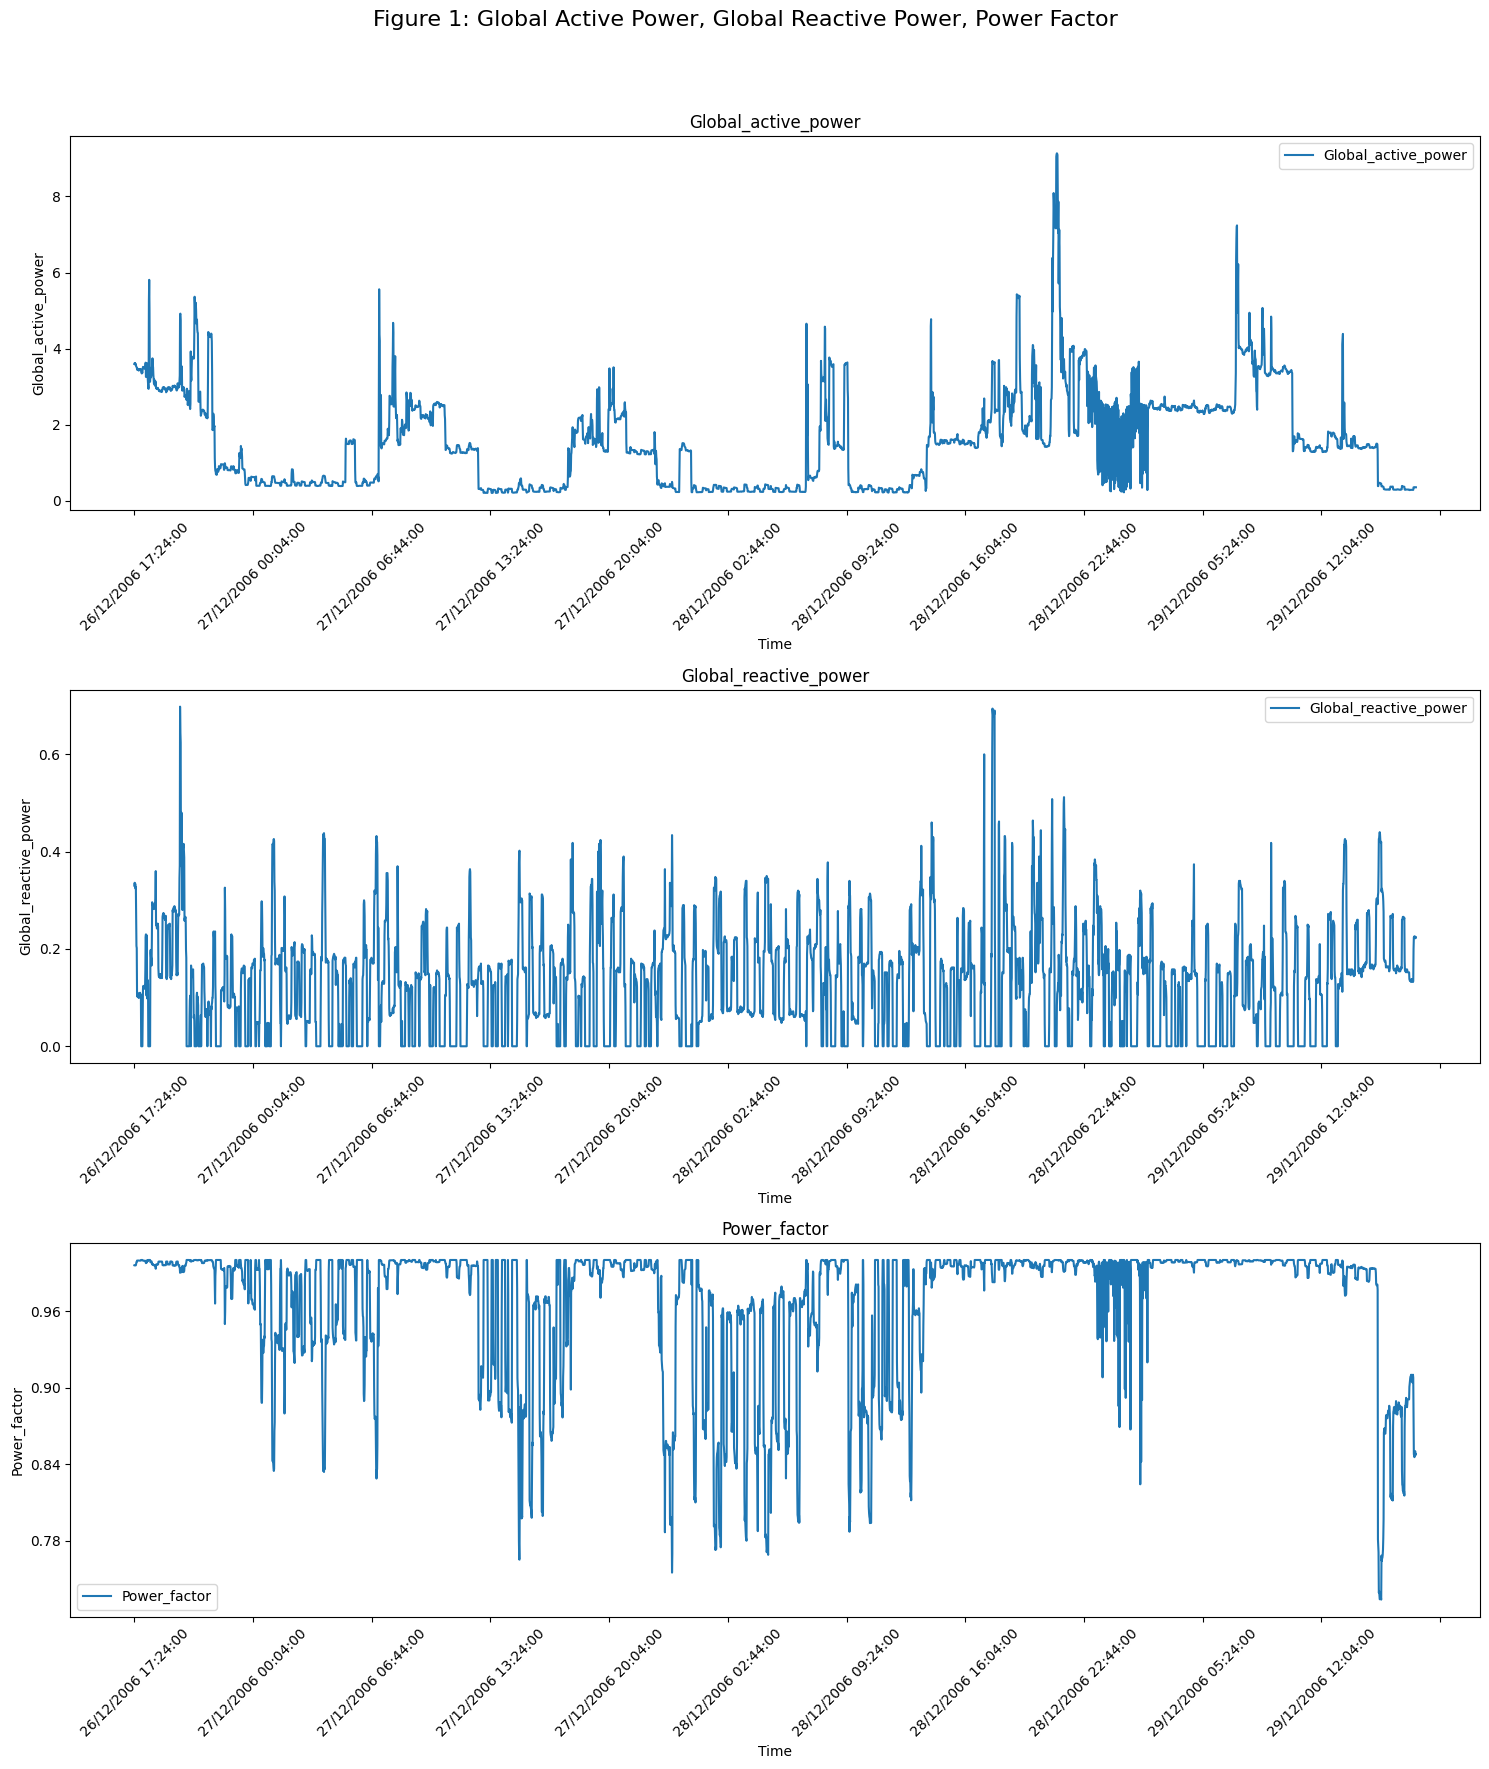

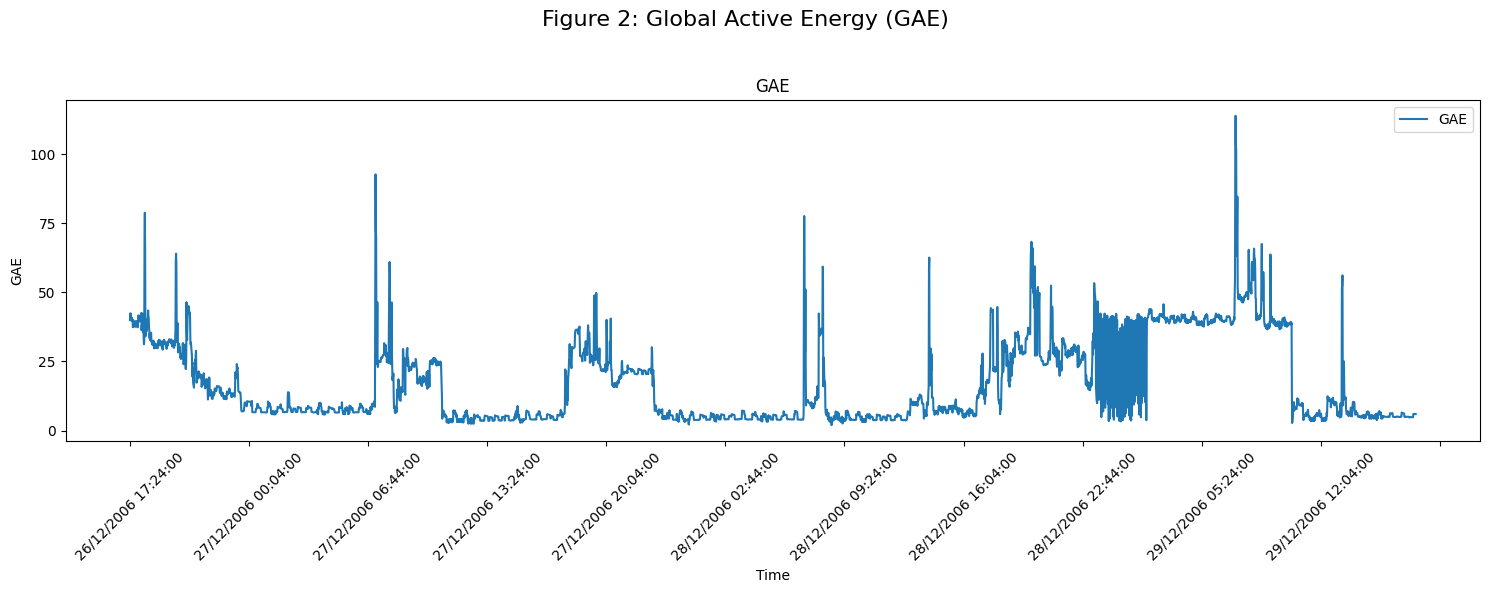

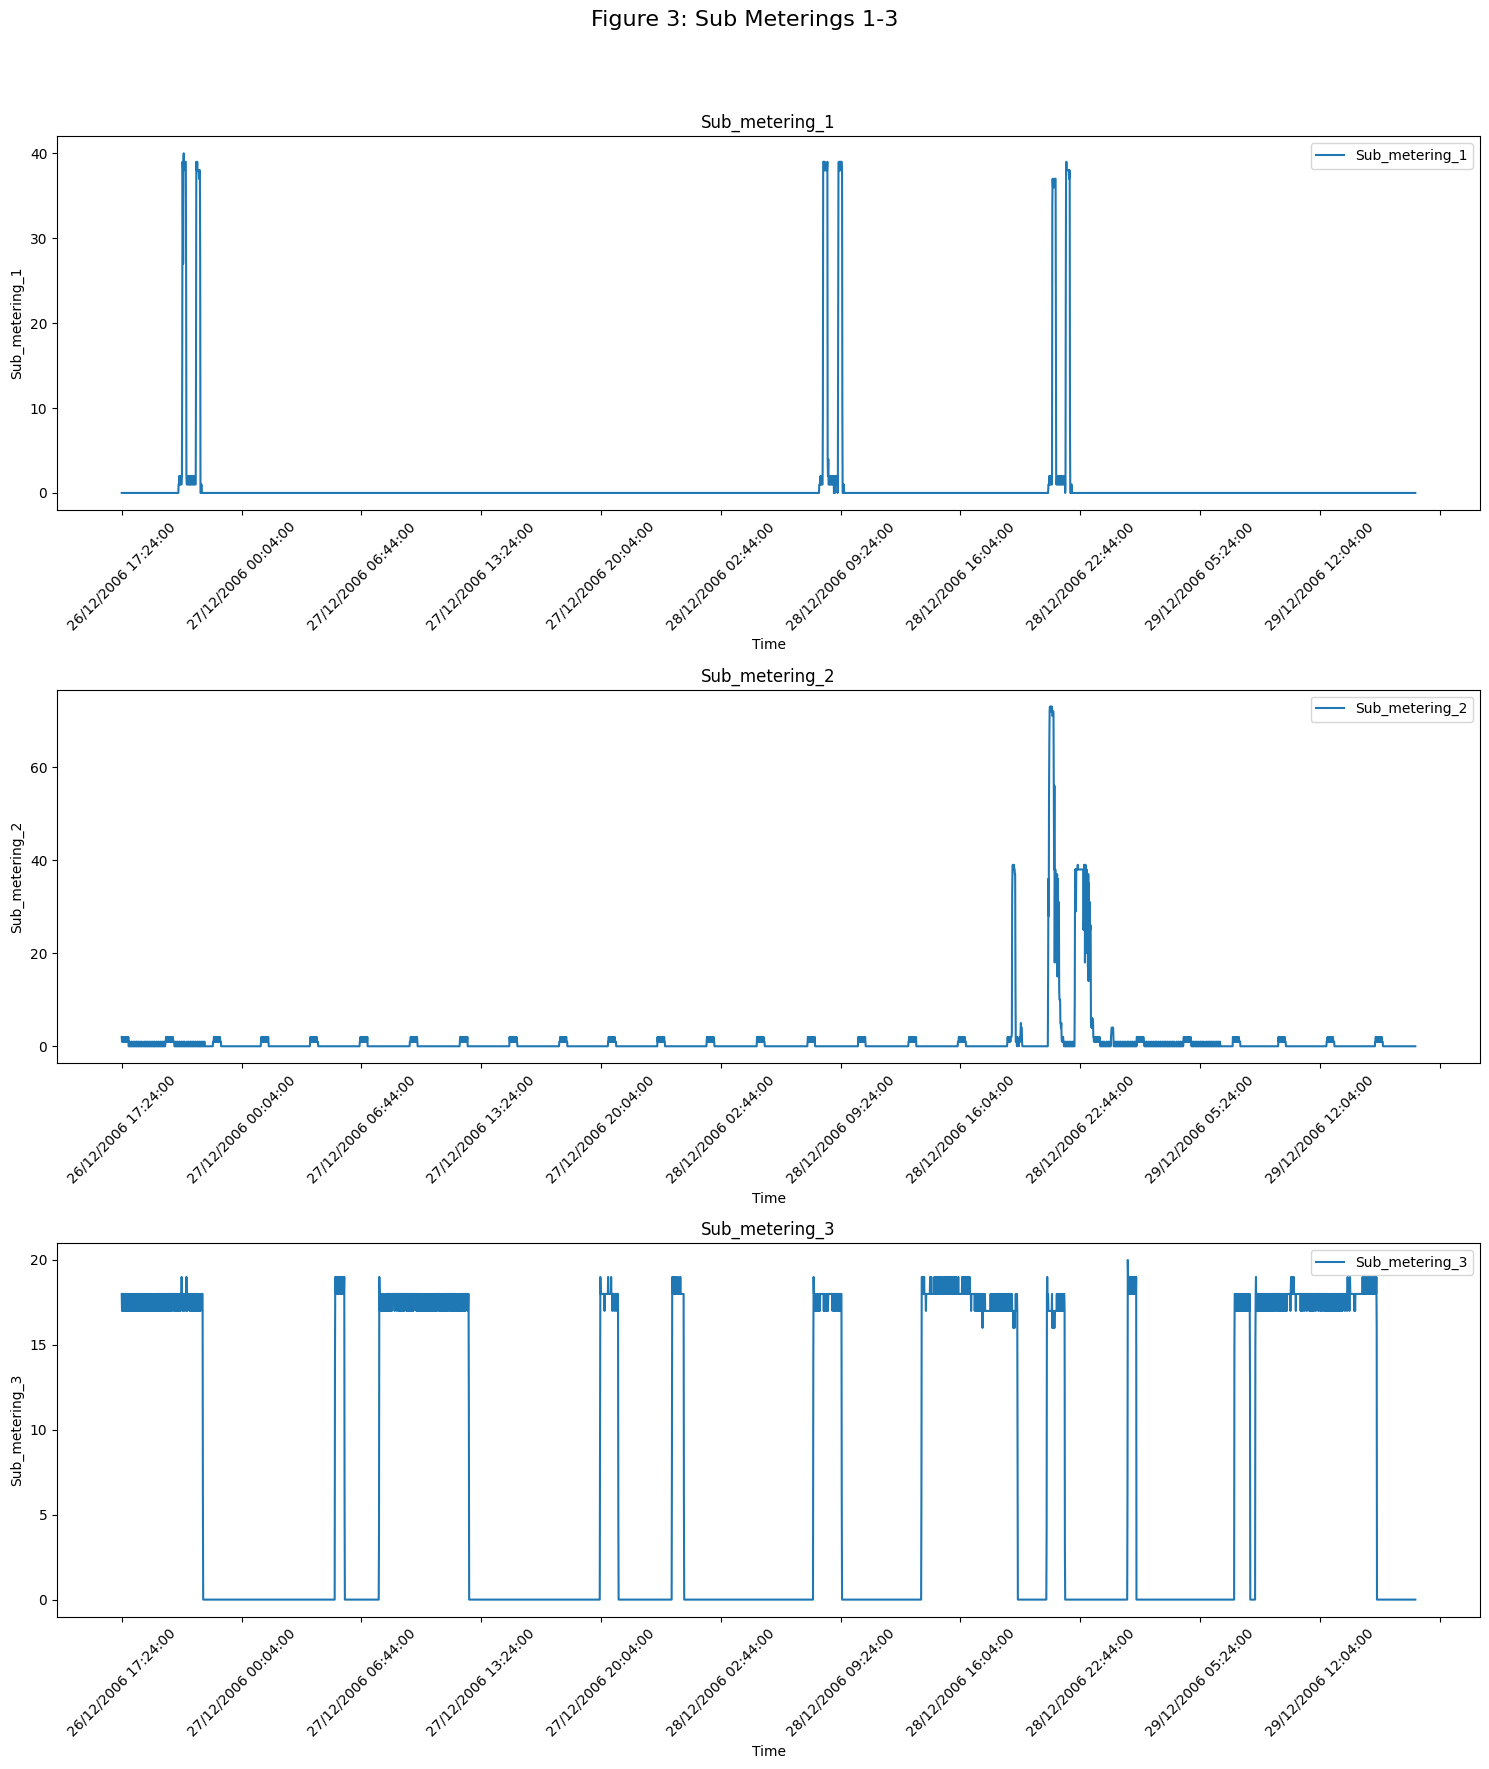

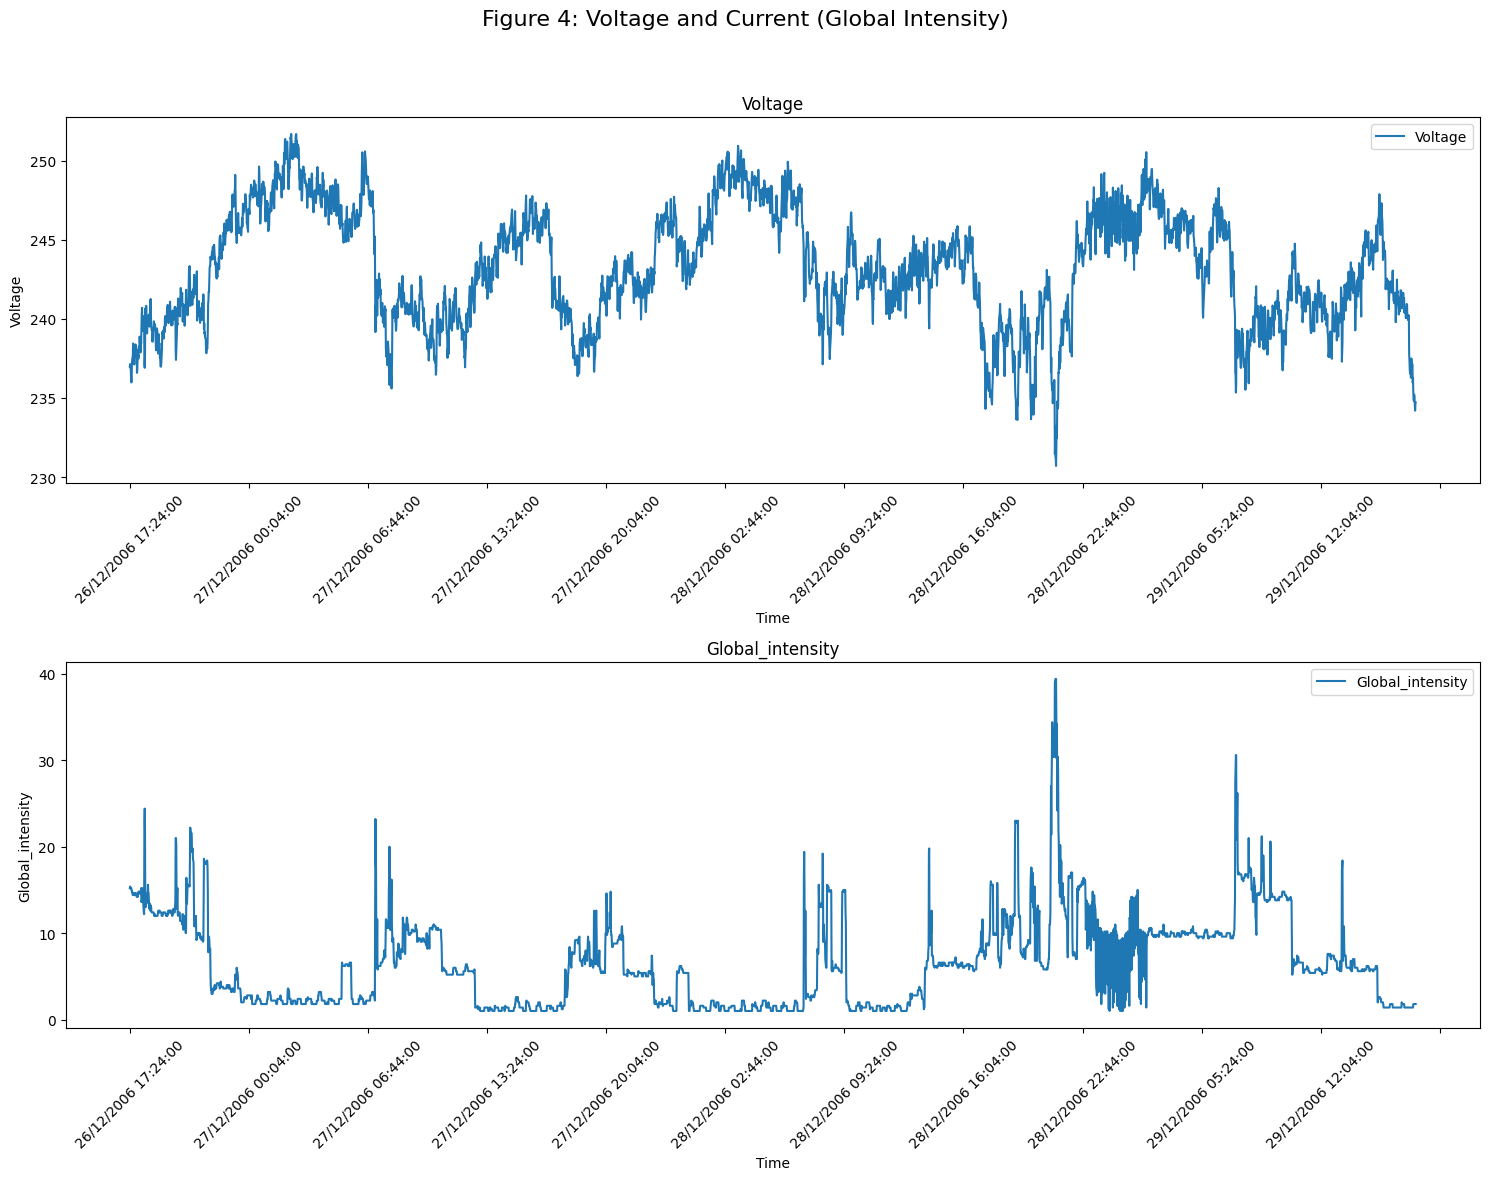

In [10]:
# Define categories for each figure
fig1_categories = ['Global_active_power', 'Global_reactive_power', 'Power_factor']
fig2_categories = ['GAE']
fig3_categories = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
fig4_categories = ['Voltage', 'Global_intensity']

# Helper function to create and format each figure
def create_figure(categories, fig_title):
    fig, axes = plt.subplots(len(categories), figsize=(15, 6 * len(categories)))
    fig.suptitle(fig_title, fontsize=16)

    for i, category in enumerate(categories):
        ax = axes[i] if len(categories) > 1 else axes
        ax.plot(X_skipped['Date_Time'], X_skipped[category], label=category)
        ax.set_title(category)
        ax.set_xlabel('Time')
        ax.set_ylabel(category)
        ax.legend()

        # Set the number of x-axis ticks to 12 and rotate labels
        ax.xaxis.set_major_locator(MaxNLocator(13))
        ax.tick_params(axis='x', rotation=45)
        
        # Set the number of y-axis ticks to 5
        ax.yaxis.set_major_locator(MaxNLocator(5))

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Create each figure based on the planned categories
create_figure(fig1_categories, 'Figure 1: Global Active Power, Global Reactive Power, Power Factor')
create_figure(fig2_categories, 'Figure 2: Global Active Energy (GAE)')
create_figure(fig3_categories, 'Figure 3: Sub Meterings 1-3')
create_figure(fig4_categories, 'Figure 4: Voltage and Current (Global Intensity)')

IndexError: index 8 is out of bounds for axis 0 with size 8

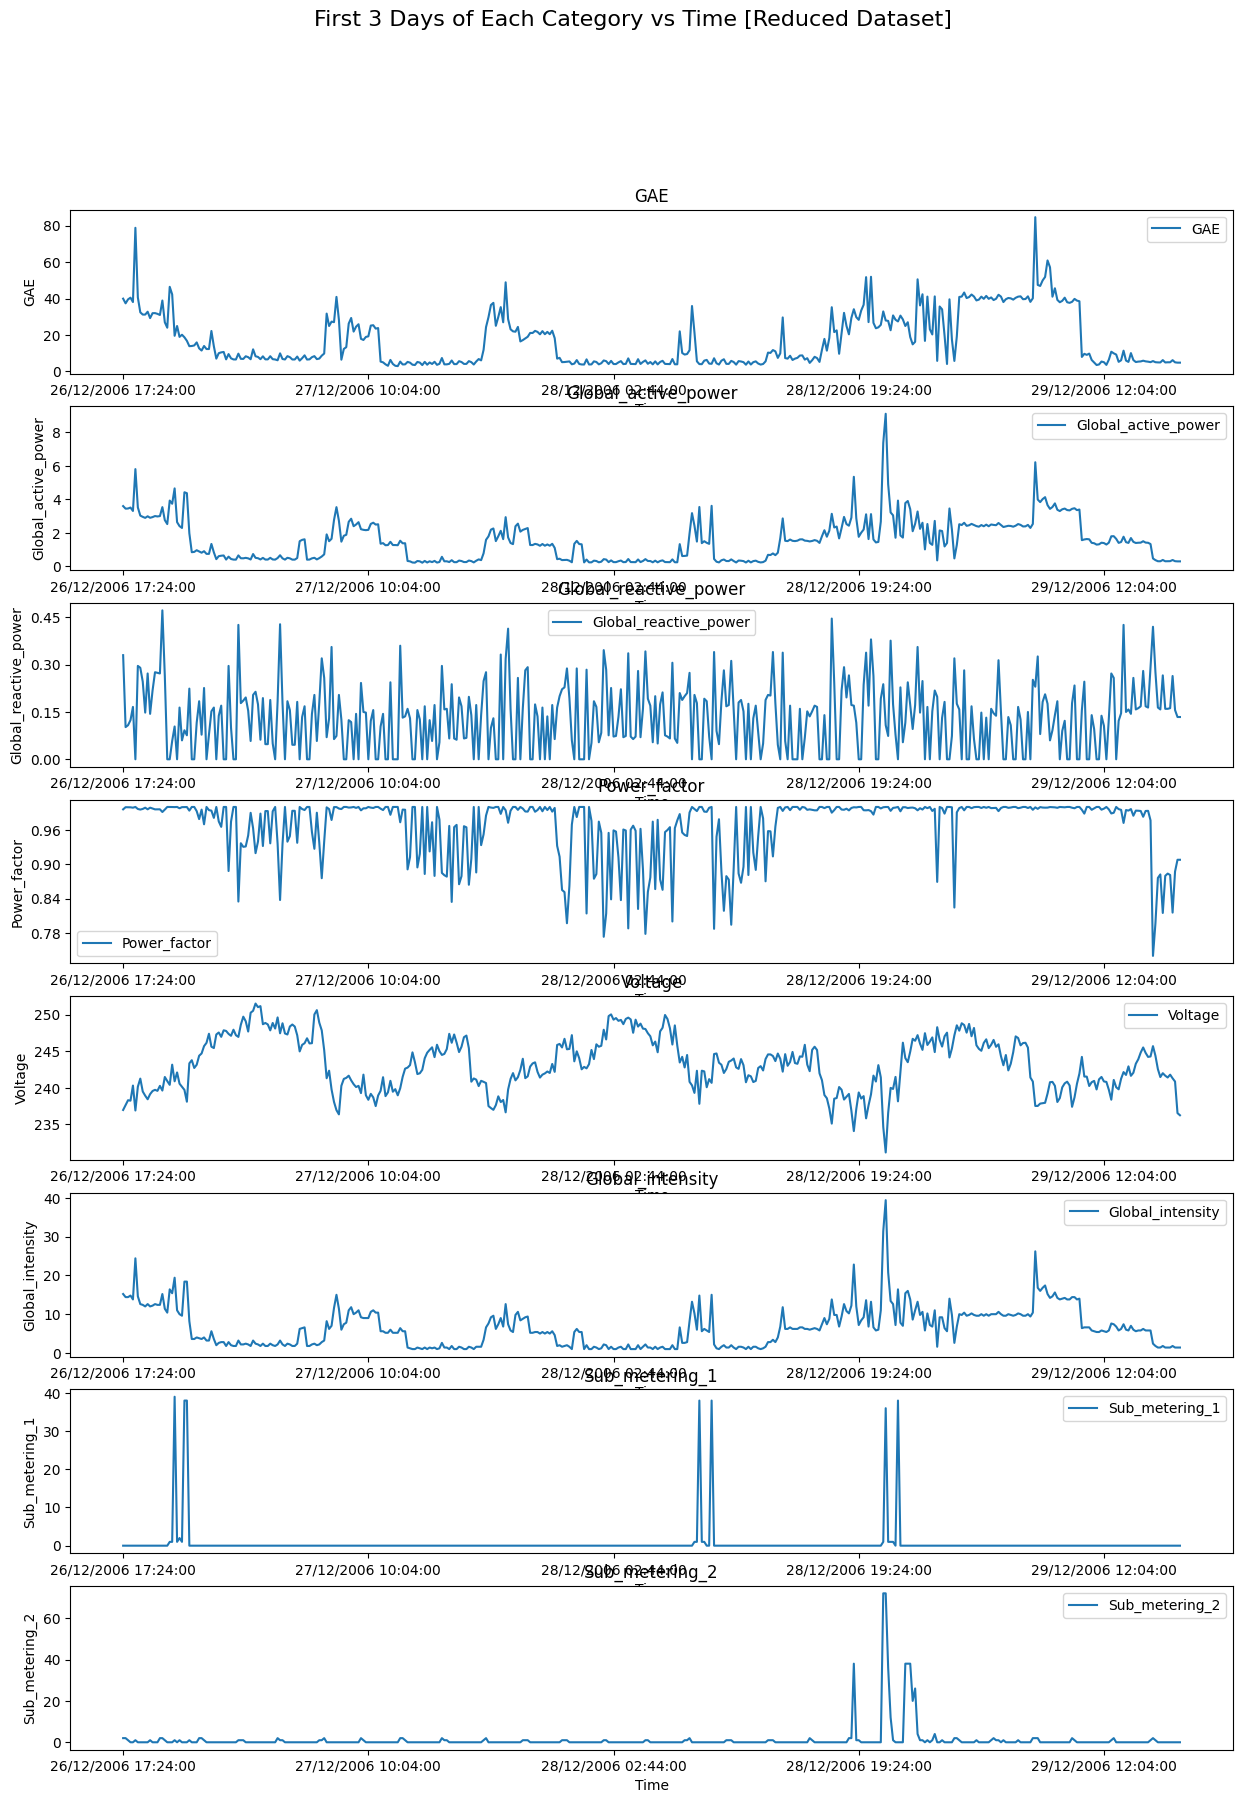

In [11]:
# Create plots for each category
fig, axes = plt.subplots(8, figsize=(15, 20))
fig.suptitle('First 3 Days of Each Category vs Time [Reduced Dataset]', fontsize=16)

category = ['GAE', 'Global_active_power', 'Global_reactive_power','Power_factor', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


# Plot each category
for i, category in enumerate(category):
    ax = axes[i]
    ax.plot(X_reduced['Date_Time'], X_reduced[category], label=category)
    ax.set_title(category)
    ax.set_xlabel('Time')
    ax.set_ylabel(category)
    ax.legend()

    # Limit the number of x-axis ticks to avoid clutter
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Adjust the number as needed
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()

In [ ]:
from datetime import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dropout

from sklearn.metrics import r2_score as sklearn_r2_score
from sklearn.preprocessing import StandardScaler

def r2_score(y_true, y_pred):
    # Cast y_true to float32 to ensure type consistency
    y_true = K.cast(y_true, dtype='float32')
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

def train_test_split(data, category:str, split=0.8):
    '''
    Splits the given data into train and test sets.
    
    PARAMETERS
    split: Fraction of the dataset to be used for training
    category: The category from the dataset to be used for y_train and y_test
    '''
    split_int = int(len(data)*split)
    X_train, X_test = np.array(data['Date_Time'][:split_int]), np.array(data['Date_Time'][split_int:])
    y_train, y_test = np.array(data[category][:split_int]).astype(float), np.array(data[category][split_int:]).astype(float)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, 'GAE', 0.8)

# Preprocessing function for Date_Time
def preprocess_datetime(data):
    """
    Converts 'Date_Time' strings to Unix timestamps.
    Adjust the format string to match your datetime format.
    """
    return np.array([
        datetime.strptime(dt, '%d/%m/%Y %H:%M:%S').timestamp() for dt in data
    ])

# Split the data
def train_test_split(data, category: str, split=0.8):
    """
    Splits the given data into train and test sets.
    """
    split_int = int(len(data) * split)
    X_train, X_test = data['Date_Time'][:split_int], data['Date_Time'][split_int:]
    y_train, y_test = np.array(data[category][:split_int]), np.array(data[category][split_int:])
    return X_train, X_test, y_train, y_test

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, 'GAE', 0.8)

# Preprocess the datetime features
X_train_processed = preprocess_datetime(X_train)
X_test_processed = preprocess_datetime(X_test)

# Scale the data (ensure 2D input for StandardScaler)
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_processed.reshape(-1, 1))  # Reshape to 2D for scaling
X_test_processed = scaler.transform(X_test_processed.reshape(-1, 1))

# # Reshape for LSTM input (3D: samples, timesteps, features)
# X_train_processed = X_train_processed.reshape(-1, 1, 1)  # Add 2nd and 3rd dimensions
# X_test_processed = X_test_processed.reshape(-1, 1, 1)

def create_windows(X_data, y_data, window_size, stride=1):
    X, y = [], []
    for i in range(0, len(X_data) - window_size, stride):
        X.append(X_data[i:i+window_size])
        y.append(y_data[i+window_size])  # Predict the next point
    return np.array(X), np.array(y)

window_size = 1000
stride = 1
X_train_windowed, y_train_windowed = create_windows(X_train_processed, y_train, window_size, stride)
X_train_windowed.shape

# Define the model
layer_list = [128, 'Dropout(0.1)', 64, 'Dropout(0.1)', 32, 1]
input_shape = (X_train_windowed.shape[1],)
model = build_fully_connected_network(layer_list, input_shape)

# # model = Sequential([
# #     Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
# #     Dropout(0.3),  # Dropout to prevent overfitting
# #     Dense(64, activation='relu'),
# #     Dropout(0.2),
# #     Dense(32, activation='relu'),
# #     Dense(1)  # Output layer for regression
# # ])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', r2_score])

# Train the model
history = model.fit(X_train_processed, y_train, 
                    epochs=50, 
                    batch_size=128, 
                    validation_data=(X_test_processed, y_test),
                    verbose=1)

# Evaluate the model
test_loss, test_mae, test_r2 = model.evaluate(X_test_processed, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}, Test R2: {test_r2}")


# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

c:\Users\G\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12971/12971 ━━━━━━━━━━━━━━━━━━━━ 13s 905us/step - loss: nan - mae: nan - r2_score: nan - val_loss: nan - val_mae: nan - val_r2_score: nan
Epoch 2/50
 8667/12971 ━━━━━━━━━━━━━━━━━━━━ 3s 787us/step - loss: nan - mae: nan - r2_score: nan

KeyboardInterrupt: 